In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from dataclasses import dataclass

from tardis.io.model.readers.snec.read_snec_output import (
    read_snec_initial_composition,
    read_snec_initial_quantities,
    read_snec_em_output, 
    read_snec_output
)
import yaml


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
SNEC_FOLDER_PATH = Path(
    "~/Downloads/tardis-data/MESA_STIR_MESA_SNEC"
)

In [4]:
SNEC_OUTPUT_QUANTITY_XG_NAME = [
    "radius",
    "mass",
    "vel",
    "rho",
    "temp",
    "logT",
    "tau",
    "lum",
    "p_rad",
    "press",
    "E_shell",
    "Ni_deposit_function",
    "ye",
    "free_electron_frac",
    "photosphere_tracer",
    "time_diff",
    "delta_time",
    "time_exp",
    "Q",
    "kappa",
    "kappa_table",
    "eps",
    "logR_op",
    "cs2",
    "H_1",
    "H_2",
    "He_1",
    "He_2",
    "He_3",
]

SNEC_INITIAL_QUANTITY_NAME = [
    "rad_initial",
    "rho_initial",
    "mass_initialpress_initial",
    "delta_mass_initial",
]

SNEC_INITIAL_COMPOSITION_NAME = [
    "H_init_frac",
    "He_init_frac",
    "C_init_frac",
    "O_init_frac",
    "Ni_init_frac",
    "metallicity_init",
]

SNEC_EM_OUTPUT_METADATA = [
    "lum_observed",
    "lum_photo",
    "vel_photo",
    "index_lumshell",
    "index_photo",
    "mass_lumshell",
    "mass_photo",
    "Ni_total_luminosity",
    "T_eff",
]

In [5]:
all_xg_files = set(
    [item.name[:-3] for item in (SNEC_FOLDER_PATH / "output").glob("*.xg")]
)
all_dat_files = set(
    [item.name[:-4] for item in (SNEC_FOLDER_PATH / "output").glob("*.dat")]
)

In [6]:
[item for item in all_dat_files if "initial" in item]

['delta_mass_initial',
 'press_initial',
 'rho_initial',
 'mass_initial',
 'rad_initial']

In [7]:
set(all_dat_files) - set(SNEC_INITIAL_QUANTITY_NAME)

{'C_init_frac',
 'H_init_frac',
 'He_init_frac',
 'Ni_init_frac',
 'Ni_total_luminosity',
 'O_init_frac',
 'T_eff',
 'conservation',
 'density_profile',
 'index_lumshell',
 'index_photo',
 'info',
 'lum_observed',
 'lum_photo',
 'magnitudes',
 'mass_initial',
 'mass_lumshell',
 'mass_photo',
 'metallicity_init',
 'opacity_corrupted',
 'opacity_floor',
 'press_initial',
 'rad_photo',
 'vel_photo',
 'velshock_index'}

In [8]:
snec_output = read_snec_output(SNEC_FOLDER_PATH)

In [9]:
read_snec_initial_composition(SNEC_FOLDER_PATH)

,cell_id,H_init_frac,He_init_frac,C_init_frac,O_init_frac,Ni_init_frac,metallicity_init
0,1,1.000003e-40,0.011700,0.007363,0.435963,0.088440,0.988300
1,2,1.000003e-40,0.011687,0.007391,0.436037,0.088332,0.988313
2,3,1.000003e-40,0.011674,0.007419,0.436110,0.088224,0.988326
3,4,1.000003e-40,0.011661,0.007448,0.436184,0.088115,0.988339
4,5,1.000003e-40,0.011648,0.007478,0.436259,0.088005,0.988352
...,...,...,...,...,...,...,...
1133,1134,2.235888e-35,0.750631,0.072886,0.098622,0.003582,0.249369
1134,1135,2.235888e-35,0.750631,0.072886,0.098622,0.003582,0.249369
1135,1136,2.235888e-35,0.750631,0.072886,0.098622,0.003582,0.249369
1136,1137,2.235888e-35,0.750631,0.072886,0.098622,0.003582,0.249369


In [10]:
read_snec_initial_quantities(SNEC_FOLDER_PATH)

,cell_id,rad_initial,rho_initial,mass_initial,press_initial,delta_mass_initial
0,1,8.698448e+08,13.695488,3.331711e+33,1.294457e+18,5.207005e+30
1,2,4.504914e+09,16.093461,3.336918e+33,1.037553e+18,5.207005e+30
2,3,5.525122e+09,17.906542,3.342125e+33,9.382324e+17,5.207005e+30
3,4,6.197898e+09,19.404294,3.347332e+33,8.772385e+17,5.207005e+30
4,5,6.710268e+09,20.697166,3.352539e+33,8.336233e+17,5.207005e+30
...,...,...,...,...,...,...
1133,1134,4.677242e+10,0.099404,9.231247e+33,1.169713e+14,5.207005e+30
1134,1135,4.860510e+10,0.069229,9.236454e+33,7.257975e+13,5.207005e+30
1135,1136,5.101698e+10,0.040285,9.241661e+33,3.590137e+13,5.207005e+30
1136,1137,5.469707e+10,0.013091,9.246868e+33,8.596186e+12,5.207005e+30


In [11]:
read_snec_em_output(SNEC_FOLDER_PATH)

,time,lum_observed,lum_photo,vel_photo,mass_lumshell,mass_photo,Ni_total_luminosity,T_eff,index_lumshell,index_photo
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0,0
1,1.703139e+03,3.524324e+40,3.487508e+40,1.839894e+09,9.252075e+33,9.252075e+33,6.676532e+42,47371.543726,1138,1138
2,3.405305e+03,2.107278e+40,2.070463e+40,1.842664e+09,9.252075e+33,9.252075e+33,6.676532e+42,29362.608884,1138,1138
3,5.106308e+03,9.884815e+39,9.516657e+39,1.843571e+09,9.252075e+33,9.252075e+33,6.676532e+42,19730.695130,1138,1138
4,6.810007e+03,1.122779e+40,1.085963e+40,1.843931e+09,9.252075e+33,9.252073e+33,6.676532e+42,17652.480037,1138,1138
...,...,...,...,...,...,...,...,...,...,...
9996,1.699338e+07,1.212225e+41,0.000000e+00,0.000000e+00,3.331711e+33,3.331711e+33,1.212225e+41,0.000000,1,1
9997,1.699509e+07,1.212225e+41,0.000000e+00,0.000000e+00,3.331711e+33,3.331711e+33,1.212225e+41,0.000000,1,1
9998,1.699670e+07,1.212225e+41,0.000000e+00,0.000000e+00,3.331711e+33,3.331711e+33,1.212225e+41,0.000000,1,1
9999,1.699841e+07,1.212225e+41,0.000000e+00,0.000000e+00,3.331711e+33,3.331711e+33,1.212225e+41,0.000000,1,1


In [12]:
snec_output.xg_data.to_xarray()

<xarray.DataArray (time: 1001, cell_id: 1138, quantity: 30)> Size: 273MB
array([[[8.69844766e+08, 3.33171076e+33, 3.33171076e+33, ...,
         0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
        [4.50491437e+09, 3.33691777e+33, 3.33691777e+33, ...,
         0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
        [5.52512187e+09, 3.34212477e+33, 3.34212477e+33, ...,
         0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
        ...,
        [5.10169810e+10, 9.24166135e+33, 9.24166135e+33, ...,
         2.52942728e-09, 1.02574446e-04, 9.99897423e-01],
        [5.46970733e+10, 9.24686835e+33, 9.24686835e+33, ...,
         1.35079299e-09, 7.55674746e-05, 9.99924431e-01],
        [6.37100030e+10, 9.25207536e+33, 9.25207536e+33, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[8.70691368e+08, 3.33171076e+33, 3.33171076e+33, ...,
         2.35742792e-17, 1.18507289e-08, 9.99999988e-01],
        [7.29293226e+11, 3.33691777e+33, 3.33691777e+33, ...,
         4.68529185e-17, 1.69462586e-08, 9.99999983e-01],
        [8.89761426e+11, 3.34212477e+33, 3.34212477e+33, ...,
         7.09031980e-17, 2.10310197e-08, 9.99999979e-01],
...
        [2.32443425e+16, 9.24166135e+33, 9.24166135e+33, ...,
         1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.60003816e+16, 9.24686835e+33, 9.24686835e+33, ...,
         1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.13420387e+16, 9.25207536e+33, 9.25207536e+33, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[8.70691368e+08, 3.33171076e+33, 3.33171076e+33, ...,
         1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [6.21225956e+14, 3.33691777e+33, 3.33691777e+33, ...,
         1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [7.69809096e+14, 3.34212477e+33, 3.34212477e+33, ...,
         1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [2.32674465e+16, 9.24166135e+33, 9.24166135e+33, ...,
         1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.60264413e+16, 9.24686835e+33, 9.24686835e+33, ...,
         1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.13731917e+16, 9.25207536e+33, 9.25207536e+33, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]])
Coordinates:
  * time      (time) float64 8kB 0.0 1.702e+04 3.404e+04 ... 1.698e+07 1.7e+07
  * cell_id   (cell_id) int64 9kB 1 2 3 4 5 6 ... 1133 1134 1135 1136 1137 1138
  * quantity  (quantity) object 240B 'radius' 'enclosed_mass' ... 'He_2' 'He_3'

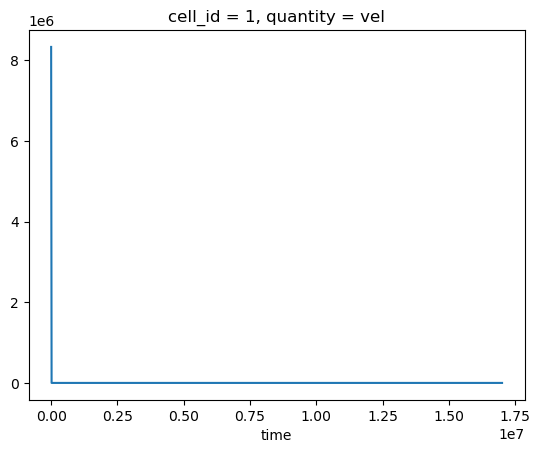

In [13]:
%matplotlib inline
snec_output.xg_data.to_xarray().sel(cell_id=1, quantity='vel').plot.line()

In [14]:
SNEC_XG_OUTPUT_QUANTITIES = {
    "radius": {
        "long_name": "Radius",
        "units": "cm",
        "description": "Radial coordinate at each point.",
    },
    "mass": {
        "long_name": "Mass",
        "units": "g",
        "description": "Mass coordinate in grams.",
    },
    "vel": {
        "long_name": "Velocity",
        "units": "cm / s",
        "description": "Fluid velocity.",
    },
    "rho": {"long_name": "Density", "units": "g / cm3", "description": "Mass density."},
    "temp": {
        "long_name": "Temperature",
        "units": "K",
        "description": "Gas temperature.",
    },
    "logT": {
        "long_name": "Log Temperature",
        "units": "dex",
        "description": "Base-10 logarithm of temperature.",
    },
    "tau": {
        "long_name": "Optical Depth",
        "units": "",
        "description": "Integrated optical depth from this point to the outer boundary.",
    },
    "lum": {
        "long_name": "Luminosity",
        "units": "erg / s",
        "description": "Local radiative luminosity (see Eq. 4 of the notes).",
    },
    "p_rad": {
        "long_name": "Radiation Pressure",
        "units": "dyn / cm2",
        "description": "Pressure due to radiation field.",
    },
    "press": {
        "long_name": "Gas Pressure",
        "units": "dyn / cm2",
        "description": "Thermal gas pressure.",
    },
    "E_shell": {
        "long_name": "Shell Energy",
        "units": "erg",
        "description": "Auxiliary shell energy quantity (see Sec. 7 of the notes).",
    },
    "Ni_deposit_function": {
        "long_name": "Ni Deposition Function",
        "units": "",
        "description": "Fractional gamma-ray energy deposition function (Eq. 46 of the notes).",
    },
    "ye": {
        "long_name": "Electron Fraction",
        "units": "",
        "description": "Ratio of free electrons to baryons.",
    },
    "free_electron_frac": {
        "long_name": "Free Electron Fraction",
        "units": "",
        "description": "Local fraction of electrons not bound in atoms.",
    },
    "photosphere_tracer": {
        "long_name": "Photosphere Tracer",
        "units": "",
        "description": "1 at the photosphere position, 0 elsewhere.",
    },
    "time_diff": {
        "long_name": "Analysis Time Difference",
        "units": "s",
        "description": "Auxiliary time difference quantity (used in analysis; Sec. 7 of the notes).",
    },
    "delta_time": {
        "long_name": "Timestep",
        "units": "s",
        "description": "Local timestep as computed in timestep.F90 (Eq. 34 of the notes).",
    },
    "time_exp": {
        "long_name": "Time Since Explosion",
        "units": "s",
        "description": "Time since explosion at each grid point (used in analysis; Sec. 7 of the notes).",
    },
    "Q": {
        "long_name": "Artificial Viscosity",
        "units": "dyn / cm2",
        "description": "Artificial viscosity term added in the momentum equation.",
    },
    "kappa": {
        "long_name": "Opacity (floored)",
        "units": "cm2 / g",
        "description": "Rosseland‐mean opacity after applying the floor (see Sec. 3.3).",
    },
    "kappa_table": {
        "long_name": "Opacity (raw)",
        "units": "cm2 / g",
        "description": "Rosseland‐mean opacity before applying the floor.",
    },
    "eps": {
        "long_name": "Internal Energy",
        "units": "erg / g",
        "description": "Specific internal energy.",
    },
    "logR_op": {
        "long_name": "Log R",
        "units": "dex",
        "description": "Logarithm of R as defined in opacity calculations (see Sec. 3.3).",
    },
    "cs2": {
        "long_name": "Sound Speed Squared",
        "units": "cm2 / s2",
        "description": "Square of the adiabatic sound speed.",
    },
    "H_1": {
        "long_name": "Neutral Hydrogen Fraction",
        "units": "",
        "description": "Fraction of hydrogen in the neutral state.",
    },
    "H_2": {
        "long_name": "Ionized Hydrogen Fraction",
        "units": "",
        "description": "Fraction of hydrogen in the first ionized state.",
    },
    "He_1": {
        "long_name": "Neutral Helium Fraction",
        "units": "",
        "description": "Fraction of helium in the neutral state.",
    },
    "He_2": {
        "long_name": "Singly Ionized Helium Fraction",
        "units": "",
        "description": "Fraction of helium in the first ionized state.",
    },
    "He_3": {
        "long_name": "Doubly Ionized Helium Fraction",
        "units": "",
        "description": "Fraction of helium in the second ionized state.",
    },
}

In [15]:
with open("snec_xg_output_quantities.yml", "w") as f:
    yaml.dump(
        SNEC_XG_OUTPUT_QUANTITIES,
        f,
        sort_keys=False,
        default_flow_style=False,
        indent=2,
    )